# Foot Stiffness Optimization to Minimize Metabolic Cost with Simulated Annealing

This notebook is to log each step performed in analyzing the results of our simulated annealing.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Import data

with open('iteration_data.pkl', 'rb') as f:
    results = pickle.load(f)

print(results)

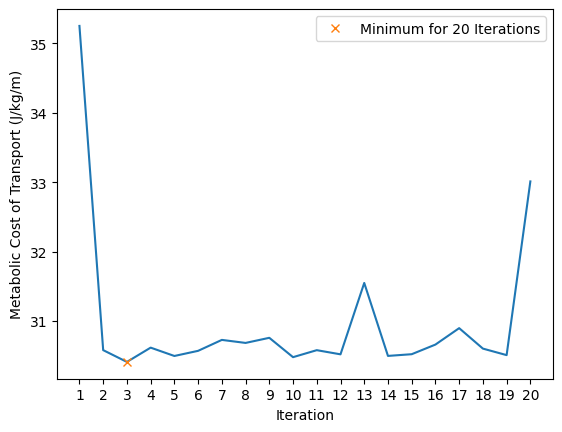

In [12]:
import numpy as np

# Plot simulated annealing results, this was run for a fixed number of iterations so it will not have converged to a value

objective = [float(x['objective']) for x in results]
iterations = [int(x['iteration']) for x in results]
minima = np.argmin(objective)
minimum_cost = objective[minima]
minimum_iter = iterations[minima]

plt.plot(iterations, objective)
plt.plot(minimum_iter, minimum_cost, 'x', label='Minimum for 20 Iterations')
plt.xticks(iterations)
plt.xlabel('Iteration')
plt.ylabel('Metabolic Cost of Transport (J/kg/m)')
plt.legend()
plt.show()